## Lab 1 - Telefonica Analysis y Forecasting

In [1]:
import re
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from dateutil.parser import parse

In [2]:
sns.set_context('notebook') 
sns.set_style('ticks')
red='#D62728'
blue='#1F77B4'
green = "g"
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]

In [4]:
data=pd.read_csv('datasets/Telefonia_movil.csv', thousands='.', decimal=',')
data.tail(10)

,Año,Trimestre,Minutos pospago salientes (miles),Minutos prepago salientes (miles),Total de minutos salientes (miles),Periodo
15,2016,4,15960765,6938892,22899656,Oct-Dic 2016
16,2017,1,14630269,6209983,20840252,Ene-Mar 2017
17,2017,2,15315167,6293563,21608730,Abr-Jun 2017
18,2017,3,15106275,6308373,21414647,Jul-Sept 2017
19,2017,4,14164552,5380710,19545262,Oct-Dic 2017
20,2018,1,13423580,5850985,19274565,Ene-Mar 2018
21,2018,2,14240217,6027374,20267591,Abr-Jun 2018
22,2018,3,14574305,6108477,20682782,Jul-Sept 2018
23,2018,4,14915060,6613685,21528745,Oct-Dic 2018
24,2019,1,13937271,6427084,20364355,Ene-Mar 2019


**Luego de cargar los datos procedemos a indexarla por trimestre por años, generando cuartiles**

In [10]:
year = []
trimestre = []
for i in range(22):
    year.append(data["Año"][i])
    trimestre.append(data["Trimestre"][i])

In [11]:
quarters = []
for i in range(22):
    trim = str(trimestre[i])
    years = str(year[i])
    quarter = years+"Q"+trim
    quarters.append(quarter)

In [12]:
index=pd.PeriodIndex(quarters, freq='Q')
index

PeriodIndex(['2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2',
             '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4',
             '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4', '2018Q1', '2018Q2'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [13]:
data["quarter"] = index
data = data.set_index("quarter")
data.head()

ValueError: Length of values does not match length of index

## Analisis exploratorio

In [21]:
y1=data['Minutos pospago salientes (miles)']
y2=data['Minutos prepago salientes (miles)']
y3=data['Total de minutos salientes (miles)']

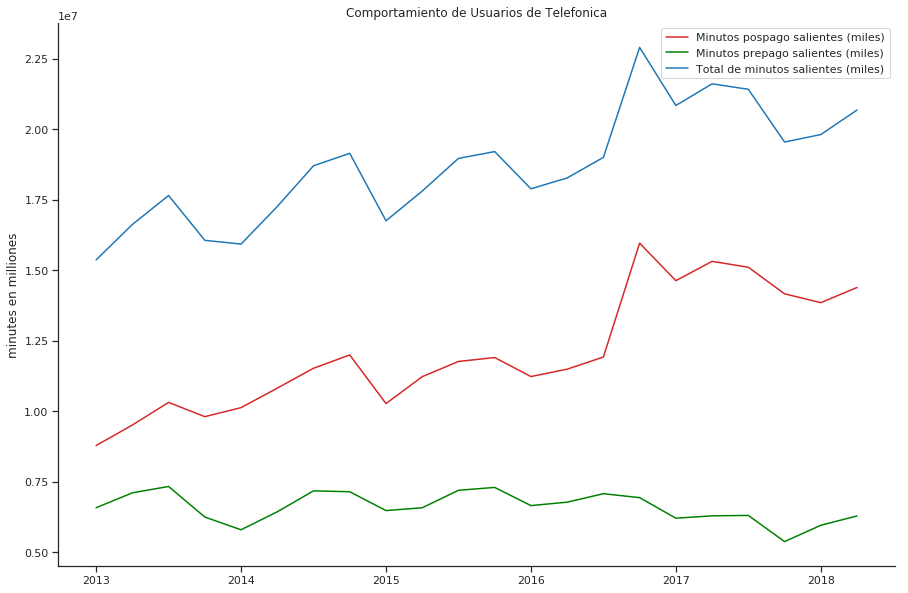

In [22]:
fig, ax= plt.subplots();#figsize=(9,6))
y1.plot(color=red)
y2.plot(color=green)
y3.plot(color=blue)
ax.set_xlabel('')
ax.set_ylabel('minutes en milliones')
ax.set_title('Comportamiento de Usuarios de Telefonica')
ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
sns.despine()
ax.legend()
plt.show()

In [12]:
# Minutos pospago salientes (miles)

print("Informacion básica sobre los datos")

print(y1.describe().round(1))
print(y2.describe().round(1))
print(y3.describe().round(1))

Basic information about our data:
count          25.0
mean     12359295.4
std       2085582.3
min       8785943.0
25%      10821463.0
50%      11905073.0
75%      14240217.0
max      15960765.0
Name: Minutos pospago salientes (miles), dtype: float64
count         25.0
mean     6562909.4
std       516860.4
min      5380710.0
25%      6250549.0
50%      6579819.0
75%      7077838.0
max      7335154.0
Name: Minutos prepago salientes (miles), dtype: float64
count          25.0
mean     18922204.7
std       1982378.3
min      15368060.0
25%      17650638.0
50%      19001229.0
75%      20364355.0
max      22899656.0
Name: Total de minutos salientes (miles), dtype: float64


# Modelos de Prediccion

## Random Walk 

In [13]:
h = 4
test=pd.period_range(start=y1.index[-1]+1, periods=h, freq='Q')
pred1=pd.Series(np.repeat(y1.iloc[-1], h), index=test) # the forecast repeats the last observed values h times
print("Minutos pospago salientes (miles) Predictions:\n", pred1)
h = 4
test=pd.period_range(start=y2.index[-1]+1, periods=h, freq='Q')
pred2=pd.Series(np.repeat(y2.iloc[-1], h), index=test) # the forecast repeats the last observed values h times
print("Minutos prepago salientes (miles) Predictions:\n", pred2)
h = 4
test=pd.period_range(start=y3.index[-1]+1, periods=h, freq='Q')
pred3=pd.Series(np.repeat(y3.iloc[-1], h), index=test) # the forecast repeats the last observed values h times
print("Total de minutos salientes (miles) Predictions:\n", pred3)

Minutos pospago salientes (miles) Predictions:
 2019Q2    13937271
2019Q3    13937271
2019Q4    13937271
2020Q1    13937271
Freq: Q-DEC, dtype: int64
Minutos prepago salientes (miles) Predictions:
 2019Q2    6427084
2019Q3    6427084
2019Q4    6427084
2020Q1    6427084
Freq: Q-DEC, dtype: int64
Total de minutos salientes (miles) Predictions:
 2019Q2    20364355
2019Q3    20364355
2019Q4    20364355
2020Q1    20364355
Freq: Q-DEC, dtype: int64


## Desviacion Estandard  de errores.

In [14]:
# Minutos pospago salientes (miles)
resid=y1-y1.shift(1) # the shift lags the series by one period
sigma1 = resid.std()
print("POSPAGO:",round(sigma1))
# Minutos prepago salientes (miles)
resid=y2-y2.shift(1) 
sigma2 = resid.std()
print("PREPAGO:",round(sigma2))
# Total de minutos salientes (miles)
resid=y3-y3.shift(1) 
sigma3 = resid.std()
print("TOTALS:",round(sigma3))

POSPAGO: 1111027.0
PREPAGO: 510833.0
TOTALS: 1409600.0


## Forecasts

In [15]:
# pospago
intv1 = pd.concat([pred1-stats.norm.ppf(0.975)*sigma1*np.sqrt(np.arange(1,h+1)),
                   pred1+stats.norm.ppf(0.975)*sigma1*np.sqrt(np.arange(1,h+1))], axis=1)
print("POSPAGO:",intv1.round())


POSPAGO:                  0           1
2019Q2  11759698.0  16114844.0
2019Q3  10857718.0  17016824.0
2019Q4  10165604.0  17708938.0
2020Q1   9582125.0  18292417.0


In [16]:
# prepago
intv2 = pd.concat([pred2-stats.norm.ppf(0.975)*sigma2*np.sqrt(np.arange(1,h+1)),
                   pred2+stats.norm.ppf(0.975)*sigma2*np.sqrt(np.arange(1,h+1))], axis=1)
intv2.round()

,0,1
2019Q2,5425870.0,7428298.0
2019Q3,5011153.0,7843015.0
2019Q4,4692930.0,8161238.0
2020Q1,4424656.0,8429512.0


In [17]:
intv3 = pd.concat([pred3-stats.norm.ppf(0.975)*sigma3*np.sqrt(np.arange(1,h+1)),
                   pred3+stats.norm.ppf(0.975)*sigma3*np.sqrt(np.arange(1,h+1))], axis=1)
intv3.round()

,0,1
2019Q2,17601589.0,23127121.0
2019Q3,16457214.0,24271496.0
2019Q4,15579104.0,25149606.0
2020Q1,14838823.0,25889887.0


## Graficos

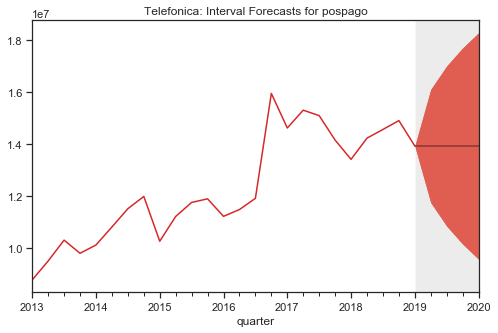

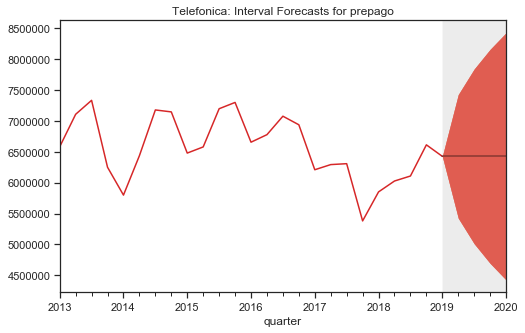

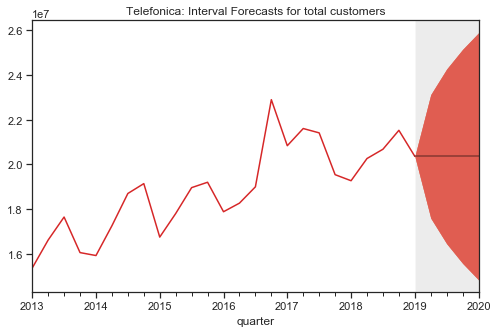

In [18]:
from plotting import fanchart

point_pred1 = (intv1[0]+intv1[1])/2
fig1, ax1 = fanchart(y1['2010':],point_pred1,intv1,intv1,intv1)
ax1.set_title('Telefonica: Interval Forecasts for pospago')
point_pred2 = (intv2[0]+intv2[1])/2
fig2, ax2 = fanchart(y2['2010':],point_pred2,intv2,intv2,intv2)
ax2.set_title('Telefonica: Interval Forecasts for prepago')
point_pred3 = (intv3[0]+intv3[1])/2
fig3, ax3 = fanchart(y3['2010':],point_pred3,intv3,intv3,intv3)
ax3.set_title('Telefonica: Interval Forecasts for total customers')
plt.show()

## Smoothing (SES)

In [19]:
model_ses1 = sm.tsa.SimpleExpSmoothing(y1).fit()
fitted_ses1 = model_ses1.fittedvalues
model_ses1.summary()

In [20]:
model_ses2 = sm.tsa.SimpleExpSmoothing(y2).fit()
fitted_ses2 = model_ses2.fittedvalues
model_ses2.summary()

In [21]:
model_ses3 = sm.tsa.SimpleExpSmoothing(y3).fit()
fitted_ses3 = model_ses3.fittedvalues
model_ses3.summary()

## Metricas:
#### Measure the quality of the predictions with Mean Square Error (MSE), Akaike Information Criterion (AIC), and Bayesian Information Criterion (BIC)

In [22]:
mse_ses1 = sm.tools.eval_measures.mse(y1,fitted_ses1)
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses1))

 In-sample fit:
 MSE               1135757341924.156


In [23]:
mse_ses2 = sm.tools.eval_measures.mse(y2,fitted_ses2)
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses2))

 In-sample fit:
 MSE               233205143744.197


In [24]:
mse_ses3 = sm.tools.eval_measures.mse(y3,fitted_ses3)
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_ses3))

 In-sample fit:
 MSE               1737743412210.765


In [25]:
N1 = len(y1)
loglik_ses1=-(N1/2)*(1+np.log(2*np.pi))-(N1/2)*np.log(mse_ses1)
aic_ses1=-2*loglik_ses1+2*3
bic_ses1=-2*loglik_ses1+np.log(N1)*3
print(' Log-likelihood    %.3f' % (loglik_ses1))
print(' AIC               {0:.3f}'.format(aic_ses1))
print(' BIC               {0:.3f}'.format(bic_ses1))

 Log-likelihood    -382.452
 AIC               770.905
 BIC               774.562


In [26]:
N2 = len(y2)
loglik_ses2=-(N2/2)*(1+np.log(2*np.pi))-(N2/2)*np.log(mse_ses2)
aic_ses2=-2*loglik_ses2+2*3
bic_ses2=-2*loglik_ses2+np.log(N2)*3
print(' Log-likelihood    %.3f' % (loglik_ses2))
print(' AIC               {0:.3f}'.format(aic_ses2))
print(' BIC               {0:.3f}'.format(bic_ses2))

 Log-likelihood    -362.663
 AIC               731.327
 BIC               734.983


In [27]:
N3 = len(y3)
loglik_ses3=-(N3/2)*(1+np.log(2*np.pi))-(N3/2)*np.log(mse_ses3)
aic_ses3=-2*loglik_ses3+2*3
bic_ses3=-2*loglik_ses3+np.log(N3)*3
print(' Log-likelihood    %.3f' % (loglik_ses3))
print(' AIC               {0:.3f}'.format(aic_ses3))
print(' BIC               {0:.3f}'.format(bic_ses3))

 Log-likelihood    -387.769
 AIC               781.537
 BIC               785.194


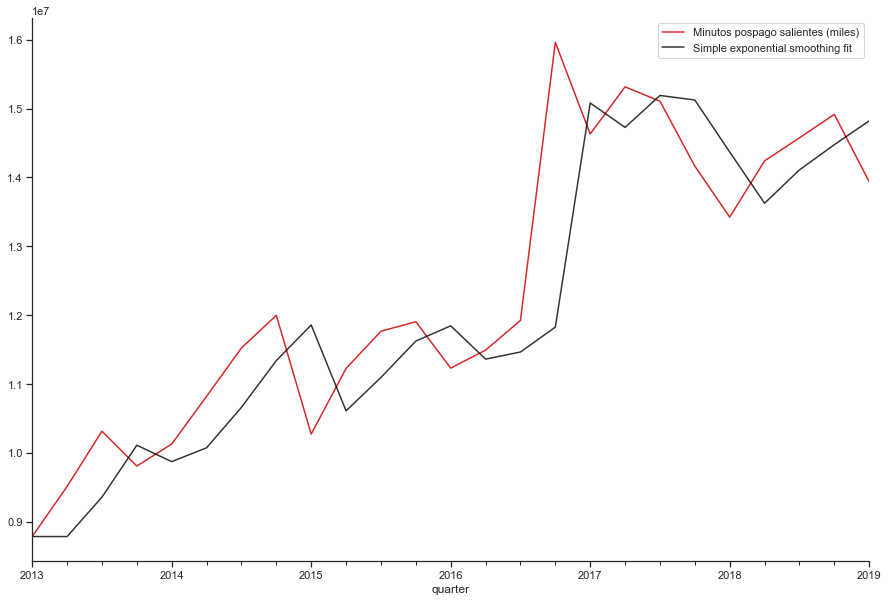

In [28]:
fig1, ax1= plt.subplots();#figsize=(9,6))
y1.plot(color=red, label='Minutos pospago salientes (miles)')
fitted_ses1.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('Quarters')
ax.set_ylabel('minutos (milliones)')
ax.set_title('Telefonica')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

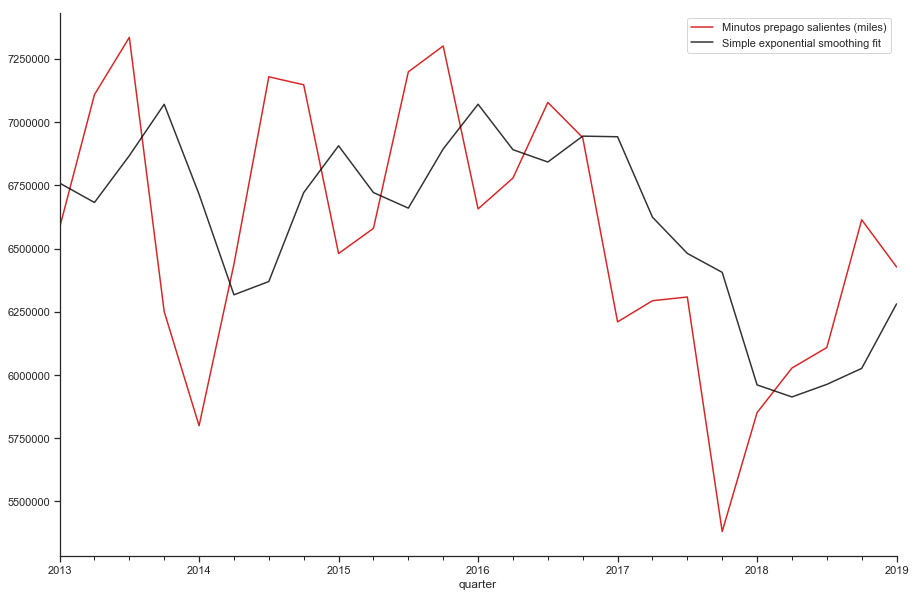

In [29]:
fig2, ax2= plt.subplots();#figsize=(9,6))
y2.plot(color=red, label='Minutos prepago salientes (miles)')
fitted_ses2.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('quarters')
ax.set_ylabel('minutos (milliones)')
ax.set_title('Telefonica')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

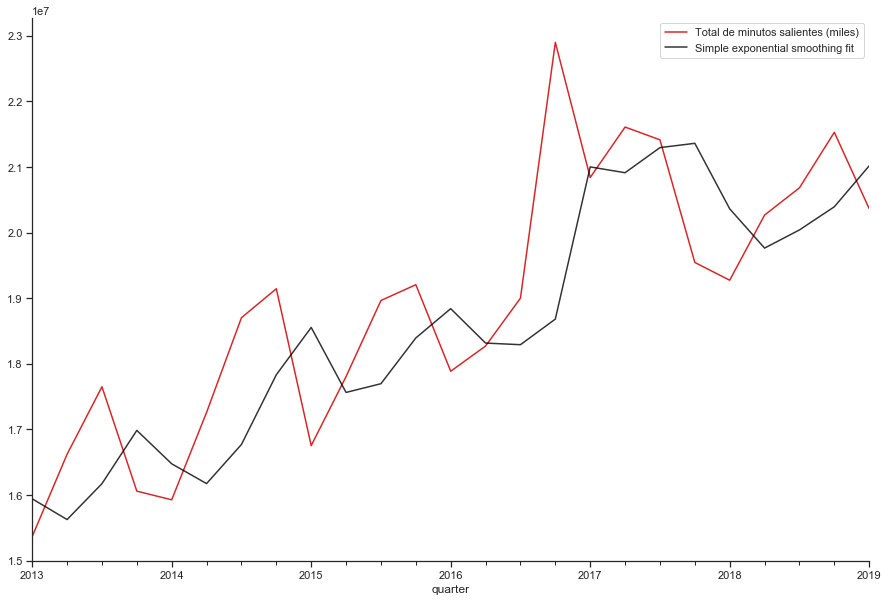

In [30]:
fig3, ax3= plt.subplots();#figsize=(9,6))
y3.plot(color=red, label='Total de minutos salientes (miles)')
fitted_ses3.plot(color='black', label='Simple exponential smoothing fit', alpha=0.8)
ax.set_xlabel('')
ax.set_ylabel('minutos (milliones)')
ax.set_title('Telefonica')
ax.set_xticks([], minor=True) 
plt.legend(loc='best')
sns.despine()
plt.show()

In [31]:
resid1=y1-fitted_ses1 # model_ses.resid isn't a panda.Series, so no index, no plot

In [32]:
resid2=y2-fitted_ses2 # model_ses.resid isn't a panda.Series, so no index, no plot

In [33]:
resid3=y3-fitted_ses3 # model_ses.resid isn't a panda.Series, so no index, no plot

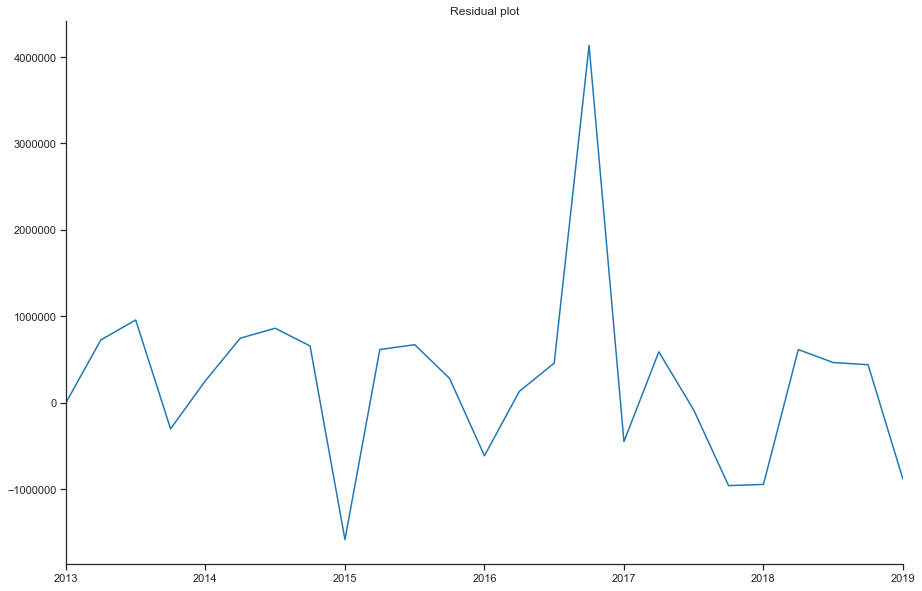

In [34]:
fig, ax= plt.subplots();#figsize=(9,6))
resid1.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

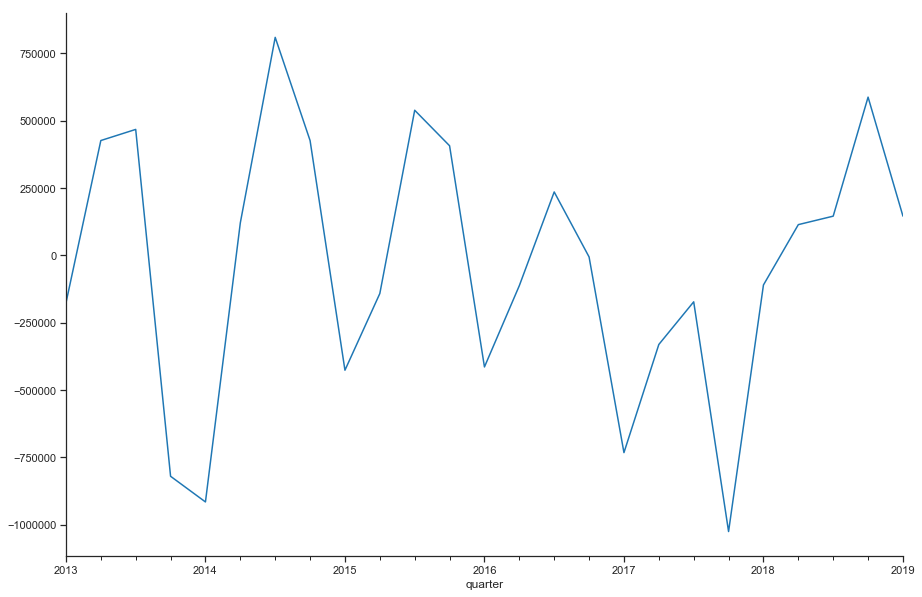

In [35]:
fig2, ax2= plt.subplots();#figsize=(9,6))
resid2.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

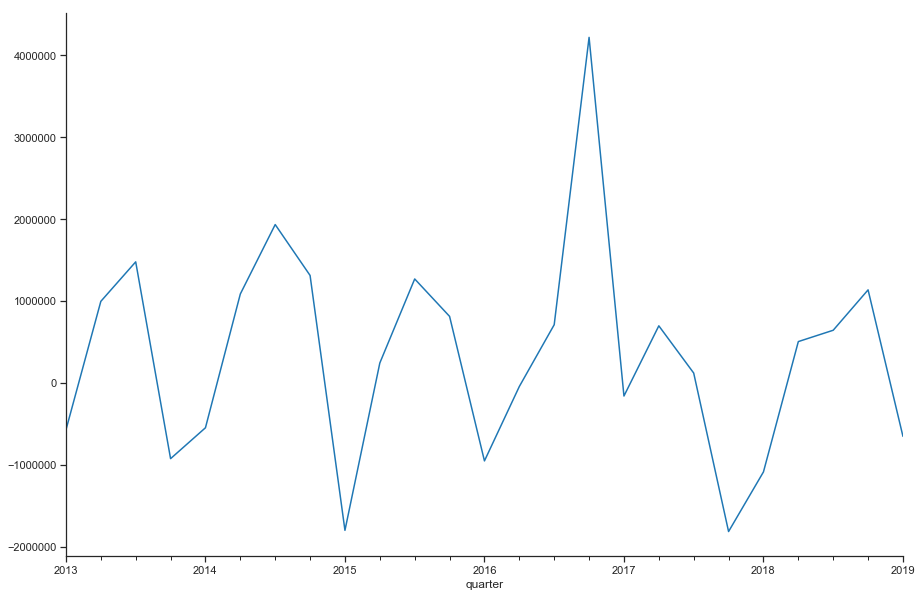

In [36]:
fig3, ax3= plt.subplots();#figsize=(9,6))
resid3.plot(color=blue)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

In [37]:
# fig, ax = plt.subplots();#figsize=(9,6))
# sm.graphics.tsa.plot_acf(resid3, lags=40, ax=ax)
# sns.despine()
# plt.show()

/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


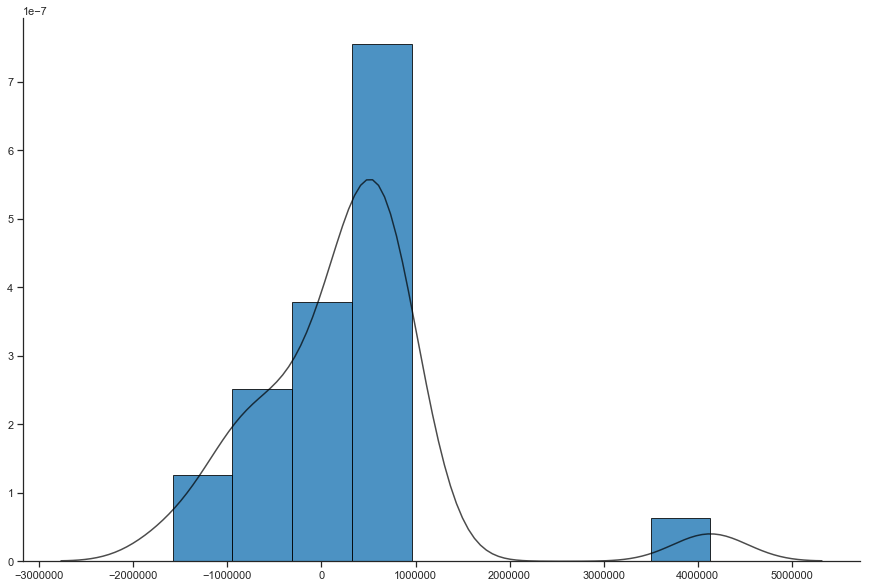

In [38]:
def hist(series):
    fig, ax= plt.subplots();#figsize=(9,6))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(resid1)
plt.show()

/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


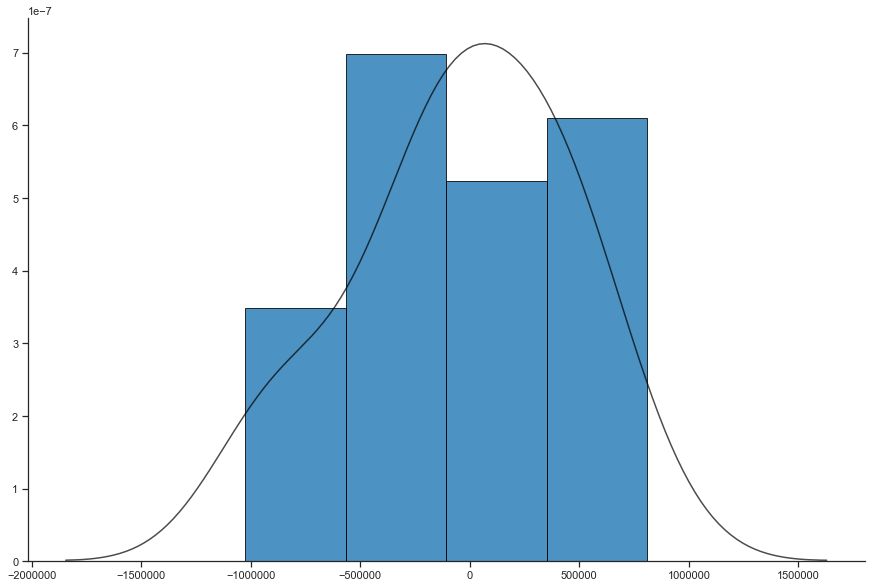

In [39]:
def hist(series):
    fig, ax= plt.subplots();#figsize=(9,6))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(resid2)
plt.show()

/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


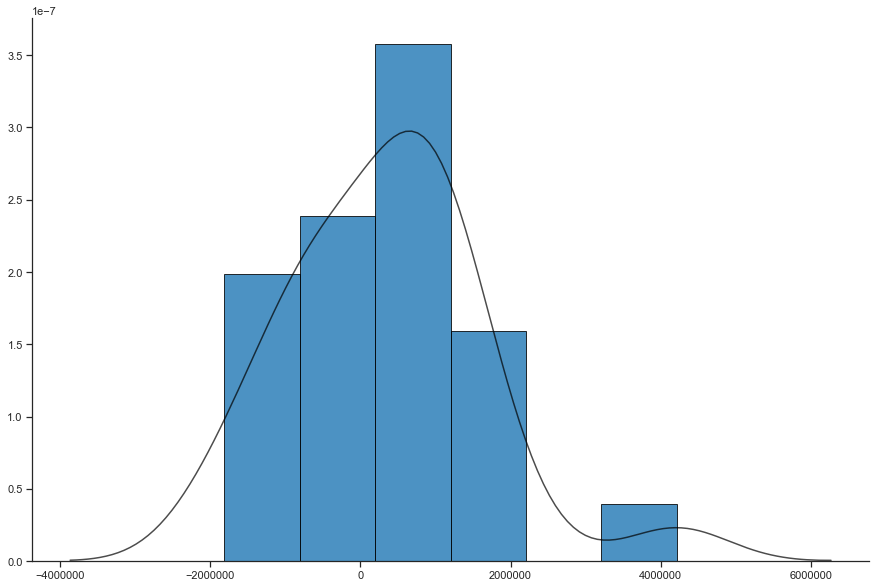

In [40]:
def hist(series):
    fig, ax= plt.subplots();#figsize=(9,6))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.8, 'edgecolor':'black', 'color': blue},  
                 kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax

hist(resid3)
plt.show()

## Model validation

### POSPAGO

In [41]:
# Real time forecasting - use it as a template - expanding window

validation=y1['2017Q2':].index # the validation period is Q1 2004 onwards
start = y1.index.get_loc('2017Q2') # numerical index corresponding to Q1 2005

pred1 = []
pred2 = []
actual= []
for i in range(start, len(y1)):
    
    actual.append(y1.iloc[i]) # actual value
    
    pred1.append(y1.iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(y1.iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation)
results_sm.tail()

/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  freq=base_index.freq)


,RW,SES,Actual
quarter,,,
2018Q1,14164552.0,1.437295e+07,13423580.0
2018Q2,13423580.0,1.359029e+07,14240217.0
2018Q3,14240217.0,1.411034e+07,14574305.0
2018Q4,14574305.0,1.448081e+07,14915060.0
2019Q1,14915060.0,1.483212e+07,13937271.0


In [42]:
from scipy import stats

table = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
RW,689138.859,258404.036
SES,690084.517,258447.695


/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  freq=base_index.freq)
/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  freq=base_index.freq)
/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  freq=base_index.freq)


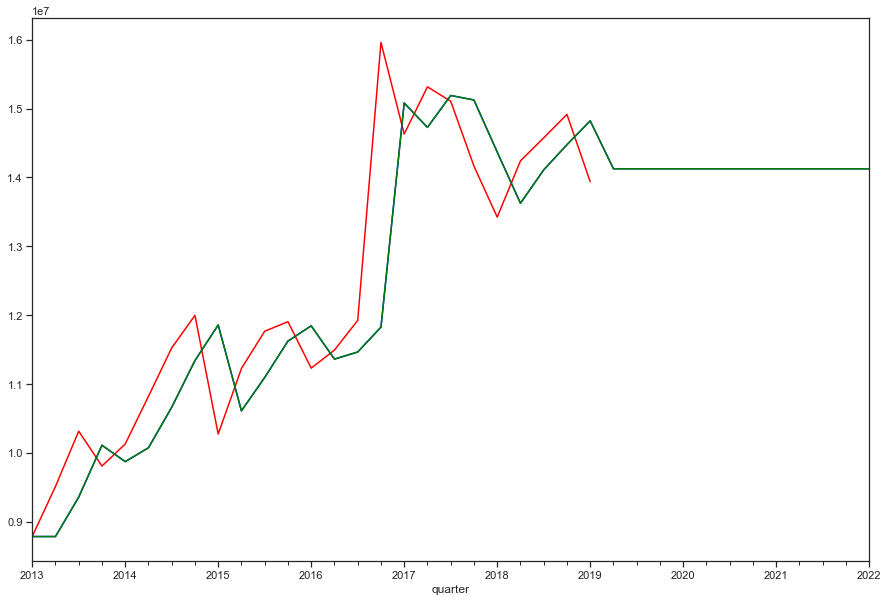

In [43]:
h=12
w=h*10
data = y1
model = sm.tsa.SimpleExpSmoothing
pred_index = y1.index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_exp = None
orig_roll = None
for i in range(0,h):
    current_exp = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current_exp).fit()
    pred_expanding.update(expanding.forecast(1))
    current_roll = pd.concat([data, pred_rolling.head(i)])
    rolling = model(current_roll.tail(w)).fit()
    pred_rolling.update(rolling.forecast(1))
    if i==0:
        orig_fit = expanding.fittedvalues
        orig_roll = rolling.fittedvalues
ax = data[-w:].plot(color='red');#figsize=(9,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_roll[-w:],pred_rolling]).plot(ax=ax,color='green');

## PREPAGO

In [44]:
# total # Real time forecasting - use it as a template - expanding window

validation=y2['2017Q2':].index # the validation period is Q1 2004 onwards
start = y2.index.get_loc('2017Q2') # numerical index corresponding to Q1 2005

pred1 = []
pred2 = []
actual= []
for i in range(start, len(y2)):
    
    actual.append(y2.iloc[i]) # actual value
    
    pred1.append(y2.iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(y2.iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation)
results_sm.tail()

/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  freq=base_index.freq)


,RW,SES,Actual
quarter,,,
2018Q1,5380710.0,6.652596e+06,5850985.0
2018Q2,5850985.0,5.888519e+06,6027374.0
2018Q3,6027374.0,5.959632e+06,6108477.0
2018Q4,6108477.0,6.026764e+06,6613685.0
2019Q1,6613685.0,6.265244e+06,6427084.0


In [45]:
from scipy import stats

table = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
RW,420812.904,158721.251
SES,638374.469,221766.694


/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  freq=base_index.freq)
/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  freq=base_index.freq)
/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  freq=base_index.freq)


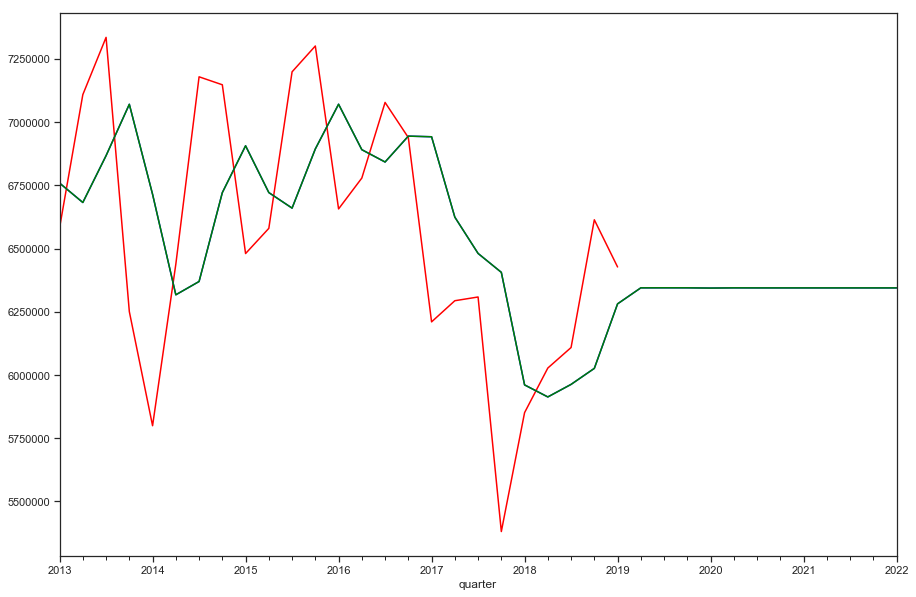

In [46]:
# Forecast
h=12
w=h*10
data = y2
model = sm.tsa.SimpleExpSmoothing
pred_index = y2.index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_exp = None
orig_roll = None
for i in range(0,h):
    current_exp = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current_exp).fit()
    pred_expanding.update(expanding.forecast(1))
    current_roll = pd.concat([data, pred_rolling.head(i)])
    rolling = model(current_roll.tail(w)).fit()
    pred_rolling.update(rolling.forecast(1))
    if i==0:
        orig_fit = expanding.fittedvalues
        orig_roll = rolling.fittedvalues
ax = data[-w:].plot(color='red');#figsize=(9,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_roll[-w:],pred_rolling]).plot(ax=ax,color='green');

## Total

In [47]:
# total # Real time forecasting - use it as a template - expanding window

validation=y3['2017Q2':].index # the validation period is Q1 2004 onwards
start = y3.index.get_loc('2017Q2') # numerical index corresponding to Q1 2005

pred1 = []
pred2 = []
actual= []
for i in range(start, len(y3)):
    
    actual.append(y3.iloc[i]) # actual value
    
    pred1.append(y3.iloc[i-1]) # random walk forecast
    
    model = sm.tsa.SimpleExpSmoothing(y3.iloc[:i]).fit() 
    pred2.append(model.forecast(1)[0]) # SES forecast

columns=['RW', 'SES', 'Actual']
results_sm = np.vstack([pred1,pred2,actual]).T
results_sm = pd.DataFrame(results_sm, columns=columns, index=validation)
results_sm.tail()

/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  freq=base_index.freq)


,RW,SES,Actual
quarter,,,
2018Q1,19545262.0,2.036427e+07,19274565.0
2018Q2,19274565.0,1.963712e+07,20267591.0
2018Q3,20267591.0,2.003151e+07,20682782.0
2018Q4,20682782.0,2.041553e+07,21528745.0
2019Q1,21528745.0,2.111516e+07,20364355.0


In [48]:
from scipy import stats

table = pd.DataFrame(0.0, index=results_sm.columns[:-1], columns=['RMSE','SE'])
for i in range(2):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results_sm.iloc[:,i], results_sm.iloc[:,-1])
    table.iloc[i,1] = (results_sm.iloc[:,i] - results_sm.iloc[:,-1]).sem()
table.round(3)

,RMSE,SE
RW,963460.265,363458.971
SES,981744.884,370363.717


/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  freq=base_index.freq)
/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  freq=base_index.freq)
/anaconda3/envs/diplodatos-ayv/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  freq=base_index.freq)


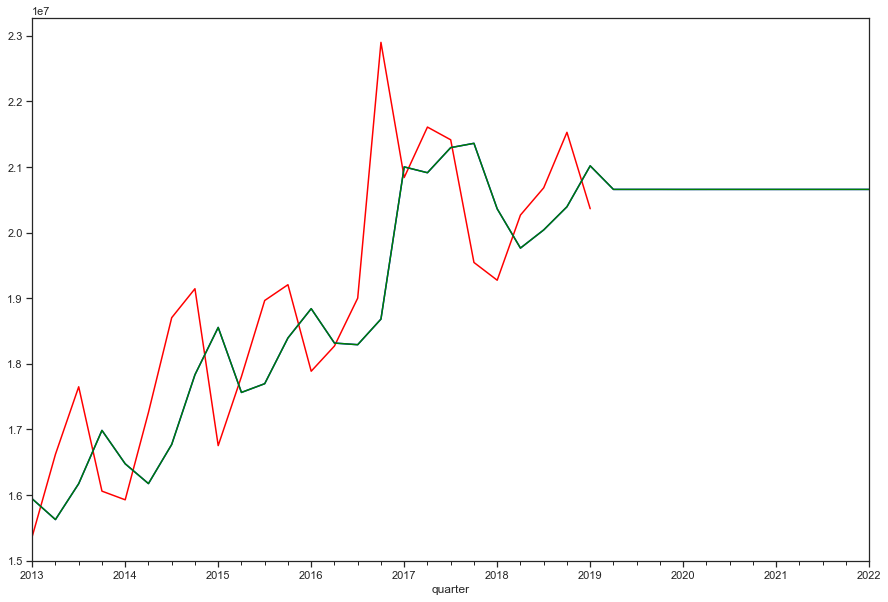

In [49]:
# Forecast
h=12
w=h*10
data = y3
model = sm.tsa.SimpleExpSmoothing
pred_index = y3.index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_exp = None
orig_roll = None
for i in range(0,h):
    current_exp = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current_exp).fit()
    pred_expanding.update(expanding.forecast(1))
    current_roll = pd.concat([data, pred_rolling.head(i)])
    rolling = model(current_roll.tail(w)).fit()
    pred_rolling.update(rolling.forecast(1))
    if i==0:
        orig_fit = expanding.fittedvalues
        orig_roll = rolling.fittedvalues
ax = data[-w:].plot(color='red');#figsize=(9,6))
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_roll[-w:],pred_rolling]).plot(ax=ax,color='green');

# Conclusiones